### Student Information
Name:

Student ID:

GitHub ID:

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# take home Excercise

In [1]:
import pandas as pd

### training data anger, anticipation, disgust, fear, sadness, surprise, trust, and joy.
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
3026,40199,My friends tell me I'm pretty. Trigger tells m...,sadness,0.640
3579,40752,Well i did hear once before that girls are att...,sadness,0.188
1393,20536,#Terrorism can be destroyed easily if #wholewo...,fear,0.500
2139,30135,@LindseySanford @simplymeasured this makes me ...,joy,0.708
1490,20633,Jesus wept! Another RNS from #rusty @metaltige...,fear,0.458


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
texts = test_df["text"]

# 創建 CountVectorizer 对象
count_vect = CountVectorizer()

# 將文本數據轉換成詞頻矩陣 ex.(0, 1312): 在文檔 0 中，詞頻矩陣的第 1312 個詞彙的出現次數為 1。
word_frequency_matrix =count_vect.fit_transform(texts)
print(word_frequency_matrix)
# 獲取所有的單詞
feature_names = count_vect.get_feature_names_out()

# 將詞頻矩陣轉成 DataFrame
word_frequency_df = pd.DataFrame(data=word_frequency_matrix.toarray(), columns=feature_names)

# 打印结果
print(word_frequency_df)

  (0, 1426)	1
  (0, 1718)	1
  (0, 428)	1
  (0, 1872)	1
  (0, 1625)	1
  (0, 464)	1
  (0, 1225)	1
  (0, 959)	1
  (0, 963)	2
  (0, 1709)	1
  (0, 36)	1
  (0, 843)	1
  (0, 1470)	1
  (0, 1940)	1
  (0, 1005)	1
  (0, 1843)	1
  (0, 1895)	1
  (0, 909)	1
  (0, 600)	1
  (1, 538)	1
  (1, 1165)	1
  (1, 147)	1
  (1, 903)	1
  (1, 1204)	1
  (1, 1035)	1
  :	:
  (345, 396)	1
  (345, 1729)	1
  (346, 1872)	1
  (346, 909)	1
  (346, 903)	1
  (346, 1009)	1
  (346, 1088)	1
  (346, 1212)	1
  (346, 779)	1
  (346, 290)	1
  (346, 867)	1
  (346, 1712)	1
  (346, 1703)	1
  (346, 1575)	1
  (346, 99)	1
  (346, 1893)	1
  (346, 934)	1
  (346, 1710)	1
  (346, 716)	1
  (346, 864)	1
  (346, 1546)	1
  (346, 858)	1
  (346, 924)	1
  (346, 611)	1
  (346, 1090)	1
     10  11  11am  12  12s  138  158  15gets20  16  17  ...  young  your  \
0     0   0     0   0    0    0    0         0   0   0  ...      0     1   
1     0   0     0   0    0    0    0         0   0   0  ...      0     0   
2     0   0     0   0    0    0    0      

In [7]:
#計算文本單字出現頻率
word_frequencies = word_frequency_df.sum(axis=0)

# 提取出現頻率最高的30個詞
top_words = word_frequencies.sort_values(ascending=False).head(30)

# 打印结果
print(top_words)
top_words.values

the     153
to      138
and      92
of       83
it       83
you      82
is       77
in       69
for      57
that     55
my       52
on       46
be       40
me       36
so       34
was      34
can      32
have     30
all      30
at       30
just     29
with     29
are      29
get      26
but      26
not      24
up       24
like     24
your     24
this     24
dtype: int64


array([153, 138,  92,  83,  83,  82,  77,  69,  57,  55,  52,  46,  40,
        36,  34,  34,  32,  30,  30,  30,  29,  29,  29,  26,  26,  24,
        24,  24,  24,  24], dtype=int64)

### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Fit and transform the training data
TFIDF_features = TFIDF_vectorizer.fit_transform(train_df['text'])

# Get feature names
feature_names_tfidf = TFIDF_vectorizer.get_feature_names_out()

# Display feature names for features 100 to 110
print("Feature names for features 100 to 110:")
print(feature_names_tfidf[100:111])
TFIDF_features.toarray()

Feature names for features 100 to 110:
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday' 'be']


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11744903, 0.65430259, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09193488, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
classification_report(y_true=y_test, y_pred=y_test_pred) #這段程式碼顯示decision tree進行分類的結果，以precision、recall、f1-score、support以及accuracy為評估分類效果的指標。
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) #此段程式碼則顯示了decision tree的混淆矩陣，我們可以從這個矩陣中觀察各種錯誤分類的分布狀況。

### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [11]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x000001E22A877A60>)

In [14]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

NB_model = MultinomialNB(force_alpha=True)
NB_model.fit(X_train, y_train)
## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)
print("testing result[:10]=",y_test_pred[:10])


acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('NB training accuracy: {}'.format(round(acc_train, 2)))
print('NB testing accuracy: {}'.format(round(acc_test, 2)))

testing result[:10]= ['fear' 'anger' 'anger' 'joy' 'fear' 'sadness' 'fear' 'fear' 'sadness'
 'fear']
NB training accuracy: 0.79
NB testing accuracy: 0.7


### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
#可有透過混淆矩陣觀察兩個分類方法的分類結果，同時也能透過precision、recall、f1-score、support以及accuracy等指標評估兩種分類方式的好壞與差異。


### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [17]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.370883,1.330597,0.417867,1.284615
1,1,0.627456,1.010759,0.654179,0.925845
2,2,0.796291,0.598776,0.711816,0.762469
3,3,0.843620,0.430895,0.708934,0.781716
4,4,0.877664,0.345509,0.697406,0.794165
5,5,0.899529,0.277161,0.677233,0.845230
6,6,0.918904,0.235309,0.694524,0.892443
7,7,0.938555,0.192436,0.671470,0.961088
8,8,0.946305,0.170130,0.671470,1.021158
9,9,0.955439,0.144511,0.654179,1.078512


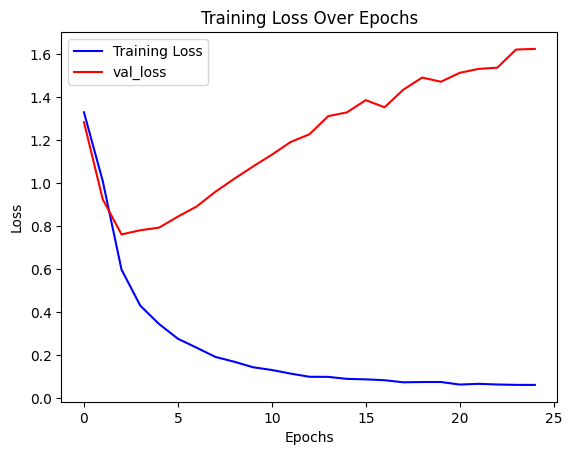

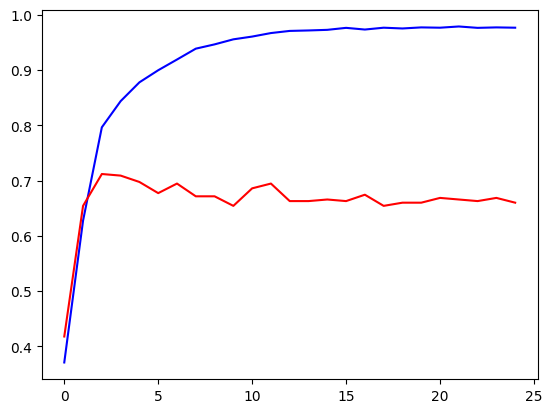

In [19]:
# Answer here
import matplotlib.pyplot as plt
loss_values = training_log["loss"].values
plt.plot(loss_values, label='Training Loss', color='blue')

val_loss_values = training_log["val_loss"].values
plt.plot(val_loss_values, label='val_loss', color='red')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.figure()
accuracy_values = training_log["accuracy"].values
plt.plot(accuracy_values, label='accuracy', color='blue')

val_accuracy_values = training_log["val_accuracy"].values
plt.plot(val_accuracy_values, label='val_accuracy', color='red')


plt.show()

### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [21]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [22]:
# Answer here
import numpy as np

# 原始句子
sentence = "I have a red hat."

# 分詞
tokens = sentence.lower().split()

# 取得每個單字的向量（如果有的話）
word_vectors = [w2v_google_model[word] for word in tokens if word in w2v_google_model]

# 使用平均法得到句子向量
if word_vectors:
    sentence_vector = np.mean(word_vectors, axis=0)
else:
    # 如果沒有找到任何單字的向量，可以考慮使用全零向量或其他默認向量
    sentence_vector = np.zeros(w2v_google_model.vector_size)

print("句子向量:", sentence_vector)

句子向量: [-0.08935547 -0.04638672  0.10286459  0.21289062 -0.03808594 -0.0357666
 -0.04957072 -0.16715495  0.00777181  0.16780598 -0.03873698 -0.14099121
 -0.13146973 -0.07609049 -0.10768636 -0.06736246 -0.01879883  0.11083984
 -0.1085612  -0.11702474 -0.07340495  0.0394694   0.11653646 -0.13850911
  0.03027344  0.07076009 -0.13118489 -0.07161459  0.08268229 -0.01593018
  0.08861288  0.11376953  0.0074056  -0.01310221 -0.00244141  0.05371094
 -0.02652995 -0.01448568 -0.10180664  0.02954102  0.08050537  0.01790365
  0.08484141 -0.01546224  0.09749349 -0.06559245  0.06799316 -0.12508138
  0.04964193 -0.01220703 -0.08044434  0.07344564  0.02864583  0.0773112
 -0.10001627  0.11417643 -0.02868652  0.0012207   0.01729329 -0.06599935
 -0.07535807  0.04856364 -0.15490723 -0.018514   -0.05692546 -0.04248047
 -0.0818278   0.06815084 -0.07257589  0.037028    0.09879557  0.10644531
  0.05581665 -0.00244141 -0.09407552 -0.0597229   0.1764323   0.11364746
 -0.05224609  0.16088867 -0.00610352 -0.1052246

### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

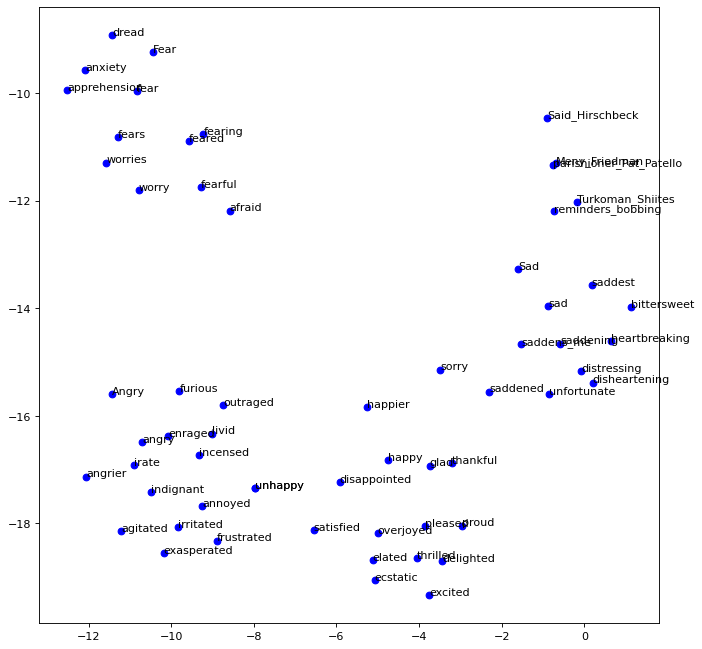

In [23]:
# %matplotlib inline  # Uncomment this line if you're running the code in a Jupyter Notebook
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# List of seed words
seed_words = ['angry', 'happy', 'sad', 'fear']

# Number of similar words to retrieve for each seed word
topn = 15

# Prepare the target words list
target_words = []
for word in seed_words:
    similar_words = [word] + [word_ for word_, sim_ in w2v_google_model.most_similar(word, topn=topn)]
    target_words.extend(similar_words)

# Prepare training word vectors
size = 200
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# t-SNE model configuration
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training
X_tsne = tsne.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne[:60, 0], X_tsne[:60, 1], c='b')  # Use a single color for all points

# Annotate the points with the corresponding words
for label, x, y in zip(target_words, X_tsne[:60, 0], X_tsne[:60, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()

# Kaggle Compitition


In [1]:
### Begin Assignment Here

In [24]:
import pandas as pd
import numpy as np

data_identification = pd.read_csv("dm2023-isa5810-lab2-homework/data_identification.csv", skiprows=1, header=None, names=["tweet_id", "identification"])
emotion = pd.read_csv("dm2023-isa5810-lab2-homework/emotion.csv", skiprows=1, header=None, names=["tweet_id", "emotion"])

print(data_identification)
emotion

         tweet_id identification
0        0x28cc61           test
1        0x29e452          train
2        0x2b3819          train
3        0x2db41f           test
4        0x2a2acc          train
...           ...            ...
1867530  0x227e25          train
1867531  0x293813          train
1867532  0x1e1a7e          train
1867533  0x2156a5          train
1867534  0x2bb9d2          train

[1867535 rows x 2 columns]


,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [25]:
import json
tweets_DM=[]
for line in open('dm2023-isa5810-lab2-homework/tweets_DM.json', 'r'):
    tweets_DM.append(json.loads(line))

In [26]:
tweets_DM

[{'_score': 391,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['Snapchat'],
    'tweet_id': '0x376b20',
    'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
  '_crawldate': '2015-05-23 11:42:47',
  '_type': 'tweets'},
 {'_score': 433,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
    'tweet_id': '0x2d5350',
    'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}},
  '_crawldate': '2016-01-28 04:52:09',
  '_type': 'tweets'},
 {'_score': 232,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['bibleverse'],
    'tweet_id': '0x28b412',
    'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'}},
  '_crawldate': '2017-12-25 04:39:20',
  '_type': 'tweets'},
 {'_score': 376,
  '_index': 'hashtag_

In [27]:
# 提取資料
extract_data = []
for tweet in tweets_DM:
    extract_data.append({
        'hashtags': tweet['_source']['tweet']['hashtags'],
        'tweet_id': tweet['_source']['tweet']['tweet_id'],
        'text': tweet['_source']['tweet']['text'],
        '_score': tweet['_score']
    })

# 將資料轉換成 DataFrame
extract_df = pd.DataFrame(extract_data)

extract_df = pd.merge(extract_df, data_identification, on='tweet_id')
# extract_df = pd.merge(extract_df, emotion, on='tweet_id')
# 顯示 DataFrame
extract_df

,hashtags,tweet_id,text,_score,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",391,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",433,train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",232,test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,376,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",989,test
...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,827,test
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,368,test
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,498,test
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",840,train


In [28]:
train_data_identification_df = extract_df.loc[extract_df["identification"] == 'train']
train_data_identification_df  = train_data_identification_df .drop(['identification'],axis=1)
train_data_identification_df = pd.merge(train_data_identification_df, emotion, on='tweet_id')
# train_data_identification_list = list(train_data_identification_df['tweet_id'])
test_data_identification_df = extract_df.loc[extract_df["identification"] == 'test']
test_data_identification_df  = test_data_identification_df .drop(['identification'],axis=1)
# test_data_identification_list = list(test_data_identification_df['tweet_id'])

In [29]:
train_data_identification_df

,hashtags,tweet_id,text,_score,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",391,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",433,sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,376,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,120,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,1021,anticipation
...,...,...,...,...,...
1455558,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,94,joy
1455559,[],0x38959e,In every circumtance I'd like to be thankful t...,627,joy
1455560,[blessyou],0x2cbca6,there's currently two girls walking around the...,274,joy
1455561,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",840,joy


In [30]:
test_data_identification_df

,hashtags,tweet_id,text,_score
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",232
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",989
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,66
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",104
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",310
...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",602
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",598
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,827
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,368


In [31]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=29000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_data_identification_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_data_identification_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\sw_ya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1455563, 500)

In [12]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

### ** >>> Decisiontree

In [13]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_data_identification_df['text'])
y_train = train_data_identification_df['emotion']

X_test = BOW_500.transform(test_data_identification_df['text'])
# y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
# print('X_test.shape: ', X_test.shape)
# print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)


In [23]:
X_train.toarray()
X_train.shape

(1455563, 500)

In [14]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anticipation', 'trust', 'joy', 'anticipation', 'trust',
       'surprise', 'sadness', 'anger', 'joy', 'anticipation'],
      dtype=object)

### ** >>> MLP regressor

In [32]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_data_identification_df['text'])
y_train = train_data_identification_df['emotion']

X_test = BOW_500.transform(test_data_identification_df['text'])

In [33]:
from sklearn.preprocessing import LabelEncoder
import keras
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print( label_encoder.classes_)


def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

Y_train = label_encode(label_encoder, y_train)

['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']


In [34]:
from sklearn.neural_network import MLPRegressor
NN=MLPRegressor(activation='logistic',solver='adam',alpha=0.00007,max_iter=15,hidden_layer_sizes=(32,32,32),verbose=True,early_stopping=False)
NN=NN.fit(X_train,Y_train)

Iteration 1, loss = 0.04414527
Iteration 2, loss = 0.04224725
Iteration 3, loss = 0.04155217
Iteration 4, loss = 0.04118128
Iteration 5, loss = 0.04096976
Iteration 6, loss = 0.04083798
Iteration 7, loss = 0.04073543
Iteration 8, loss = 0.04067100
Iteration 9, loss = 0.04062176
Iteration 10, loss = 0.04058655
Iteration 11, loss = 0.04056174
Iteration 12, loss = 0.04053952
Iteration 13, loss = 0.04052073
Iteration 14, loss = 0.04051025
Iteration 15, loss = 0.04050457


c:\Users\sw_ya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
mlp_pre=NN.predict(X_train)
mlp_pre=label_decode(label_encoder,mlp_pre)

In [36]:
mlp_pre_test=NN.predict(X_test)
mlp_pre_test=label_decode(label_encoder,mlp_pre_test)

In [37]:
output5= pd.DataFrame({'id':test_data_identification_df .tweet_id , 'emotion': mlp_pre_test})
output5.to_csv('mlp_predict.csv', index=False)

# Report

##### 一開始使用 pandas 的 read_csv 函數讀取 "data_identification.csv"的"tweet_id", "identification"以及 "emotion.csv"裡面的"tweet_id", "emotion"資訊。

##### 接著打開名為 "tweets_DM.json" 的 JSON 文件，逐行讀取其中的 JSON 數據，將每行的 JSON 字符串轉換為 Python 對象，然後將這些對象添加到 tweets_DM 列表中。

##### 接著提取從 JSON 文件中讀取的數據，然後將其轉換為 pandas DataFrame。再用pd.merge將其與 'data_identification' DataFrame 合併成extract_df。

##### 根據'identification'的信息，將extract_df分離出train_data_identification_df 以及test_data_identification_df兩個新的DataFrame，分別儲存了訓練資料以及測試資料。

##### 使用 nltk 和 CountVectorizer 來建立一個詞袋模型（Bag-of-Words），然後將這個模型應用到訓練數據上。這裡我一開始使用Lab2-Master所設定的BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 來建立一個 CountVectorizer 的實例。BOW_500.fit(train_data_identification_df['text'])用來將訓練數據的文本列擬合（fit）這個模型，從而獲取訓練文本中的詞彙表。

##### 得到訓練文本中的詞彙表後，就可以使用不同模型開始訓練。我首先嘗試Lab2-Master裡面使用的decision tree模型，但訓練的結果並不好，而且訓練時長非常久(約2多個小時，才transform + fit完)。

##### 之後我使用MLP regressor模型進行訓練。我沒有進行任何cleaning之類的前處理作業，就直接進行模型訓練。首先將y_training(訓練資料的答案，也就是emotion)做one-hot encoding的處理，方便模型訓練。接著使sklearn.neural_network 中的MLPRegressor。參數如下：

#### NN=MLPRegressor(activation='logistic',solver='adam',alpha=0.00007,max_iter=15,hidden_layer_sizes=(32,32,32),verbose=True,early_stopping=False)


##### 訓練的迭帶次數基本上介於13-15次之間，且根據測試分數結果，我發現BOW_500 = CountVectorizer 中的max_features是影響結果非常重要的參數，原則上越高越好。我最後採用max_features=29000

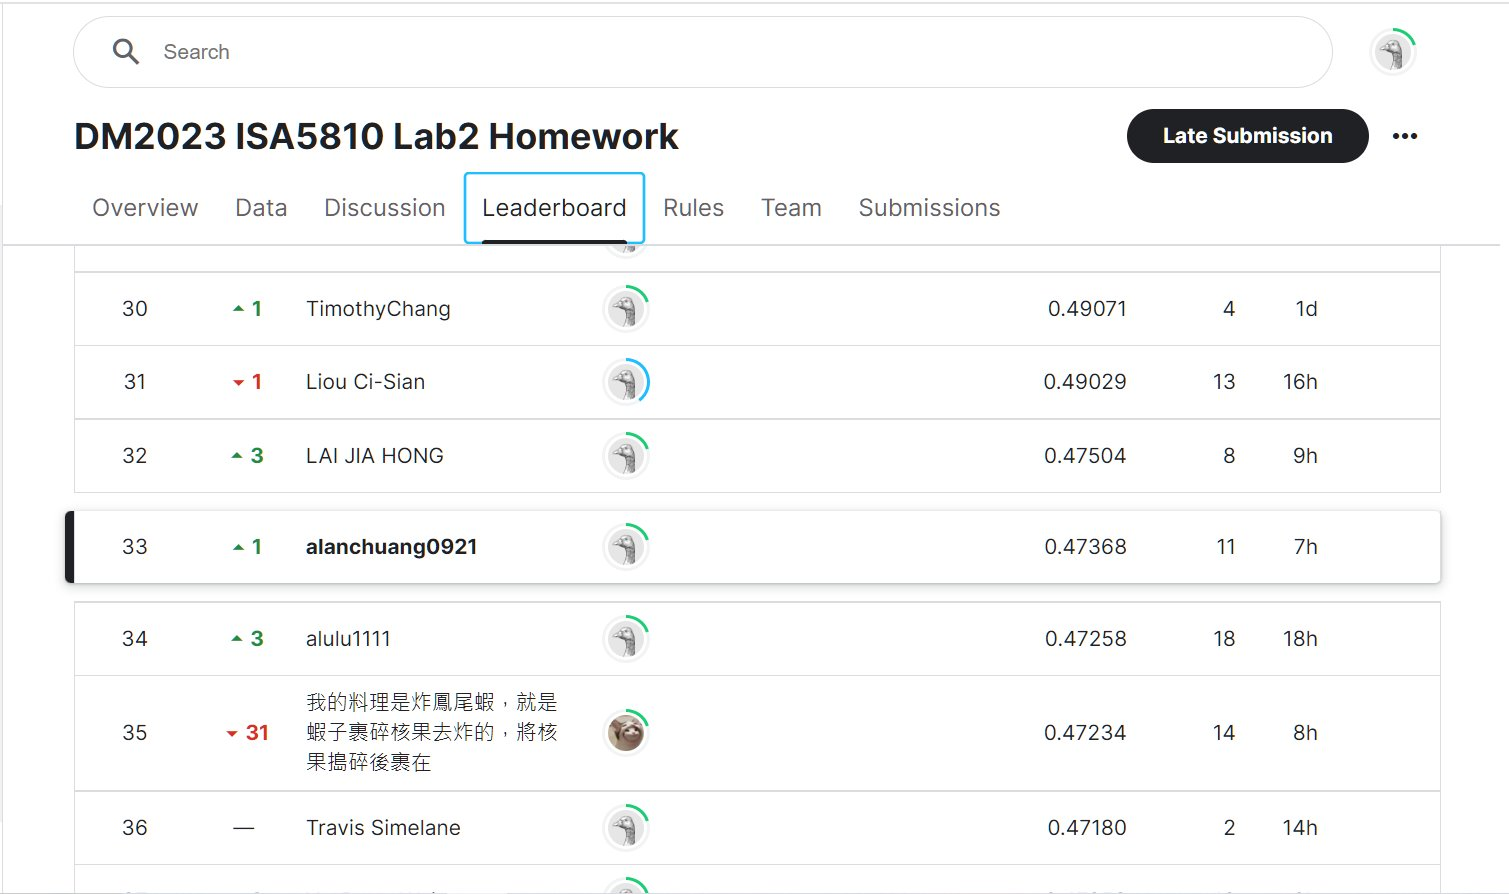

In [39]:
from IPython.display import Image

# 指定圖片文件的路徑
image_path = "3644117f-05da-4812-b2fc-e5ec55c91add.jpg"

# 顯示圖片
Image(filename=image_path)